In [1]:
#extreme values are outliers

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]

In [6]:
#five points summary
#min, 25th, 50th, 75th, 100th 
np.quantile(salary,[0,0.25,.50,.75,.1])

array([11.  , 59.  , 71.  , 90.75, 45.3 ])

In [8]:
df = pd.DataFrame(salary,columns=['salary'])

In [9]:
df


,salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


In [12]:
df.describe()

,salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


In [13]:
#To check outlier >> distplot, boxplot

Text(0.5, 1.0, 'box plot')

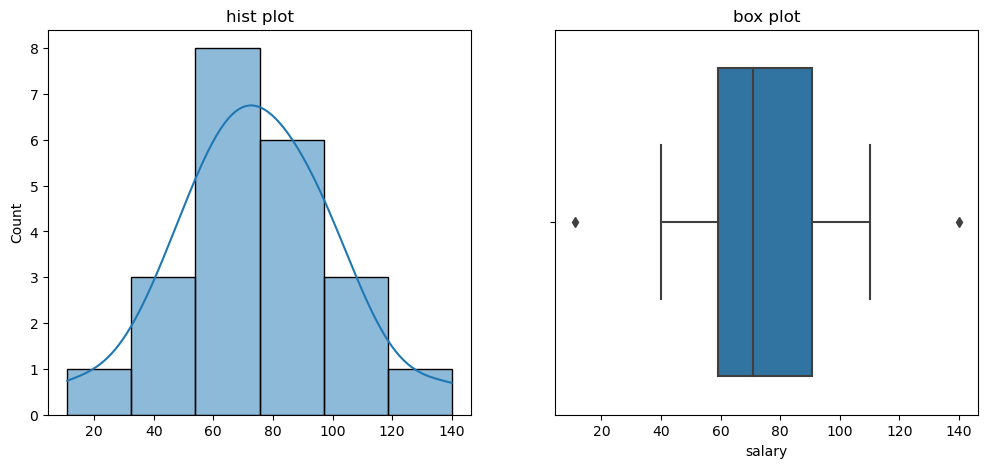

In [18]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(salary,kde = True)
plt.title("hist plot")

plt.subplot(1,2,2)
sns.boxplot(x = 'salary',data = df)
plt.title("box plot")

In [19]:
#Dropping the outlier
#Capping the outlier
#replace with mean/median

In [20]:
#dropping the outlier
q1 = df['salary'].quantile(0.25)
q3 = df['salary'].quantile(0.75)

IQR = q3 - q1

lower_fence = q1 - 1.5 * IQR
upper_fence = q1 + 1.5 * IQR

In [21]:
lower_fence

11.375

In [22]:
upper_fence

106.625

In [23]:
df_filtered = df[(df.salary >= lower_fence ) & (df.salary<= upper_fence)]

In [25]:
df_filtered

,salary
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74
10,91


In [27]:
df_filtered.shape

(19, 1)

Text(0.5, 1.0, 'box plot')

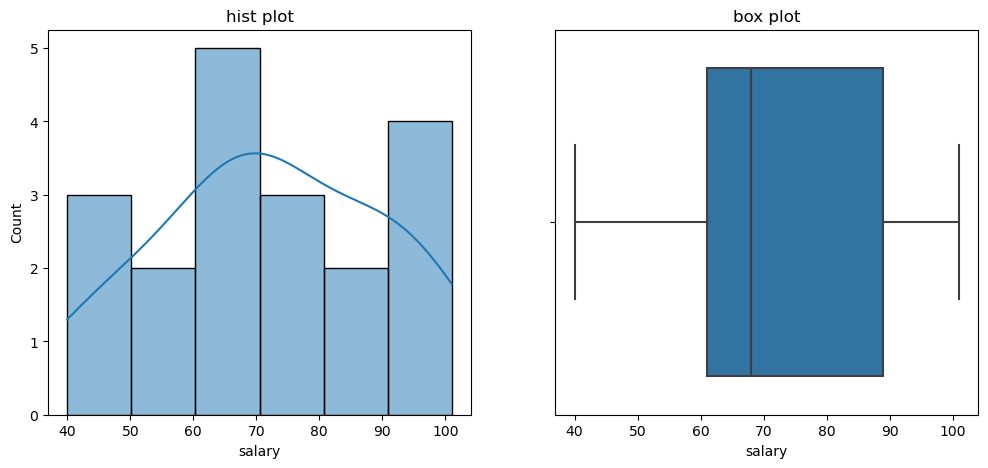

In [28]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df_filtered['salary'],kde = True)
plt.title("hist plot")

plt.subplot(1,2,2)
sns.boxplot(x = 'salary',data = df_filtered)
plt.title("box plot")

In [30]:
#imputation with mean and median
df['salary_imputed_mean'] = np.where((df.salary>= upper_fence) |  (df.salary<=lower_fence),df['salary'].mean(),df['salary'])

In [31]:
df['salary_imputed_mean']

0      74.318182
1      40.000000
2      45.000000
3      68.000000
4      65.000000
5      68.000000
6      78.000000
7      90.000000
8      57.000000
9      74.000000
10     91.000000
11     92.000000
12     88.000000
13     68.000000
14     57.000000
15     48.000000
16     99.000000
17    101.000000
18     68.000000
19     77.000000
20     74.318182
21     74.318182
Name: salary_imputed_mean, dtype: float64

Text(0.5, 1.0, 'box plot')

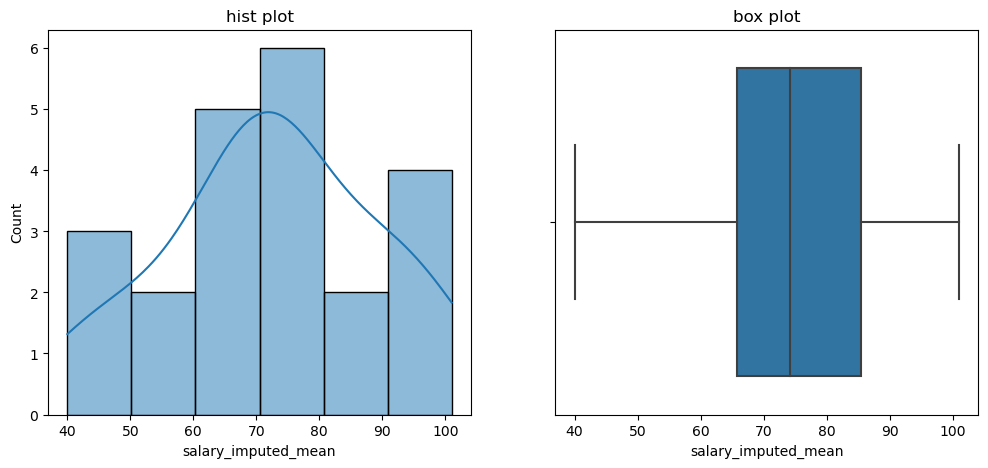

In [33]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary_imputed_mean'],kde = True)
plt.title("hist plot")

plt.subplot(1,2,2)
sns.boxplot(x = 'salary_imputed_mean',data = df)
plt.title("box plot")

In [34]:
df['salary_imputed_median'] = np.where((df.salary>= upper_fence) |  (df.salary<=lower_fence),df['salary'].median(),df['salary'])

In [35]:
df['salary_imputed_median'] 

0      71.0
1      40.0
2      45.0
3      68.0
4      65.0
5      68.0
6      78.0
7      90.0
8      57.0
9      74.0
10     91.0
11     92.0
12     88.0
13     68.0
14     57.0
15     48.0
16     99.0
17    101.0
18     68.0
19     77.0
20     71.0
21     71.0
Name: salary_imputed_median, dtype: float64

Text(0.5, 1.0, 'box plot')

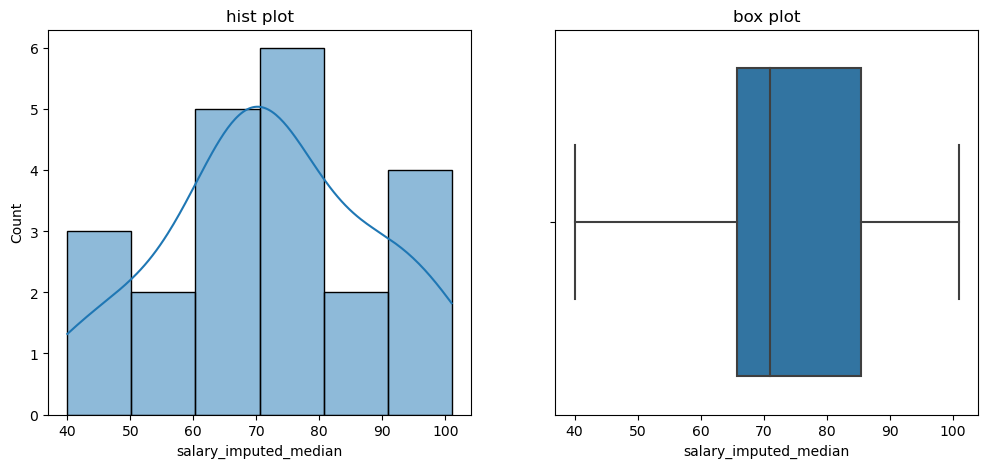

In [36]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary_imputed_median'],kde = True)
plt.title("hist plot")

plt.subplot(1,2,2)
sns.boxplot(x = 'salary_imputed_median',data = df)
plt.title("box plot")

In [37]:
#Capping >> replacing with the nearest value which is not outlier
df

,salary,salary_imputed_mean,salary_imputed_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


In [38]:
lower_cap = df['salary'].quantile(0.05)
upper_cap = df['salary'].quantile(0.95)

In [39]:
lower_cap

40.25

In [40]:
upper_cap

109.55

In [41]:
#replace outliers with the cap

In [44]:
df['salary_capped'] = np.where(df['salary']<lower_cap,lower_cap,np.where(df['salary']>upper_cap,upper_cap,df['salary']))

In [45]:
df['salary_capped']

0      40.25
1      40.25
2      45.00
3      68.00
4      65.00
5      68.00
6      78.00
7      90.00
8      57.00
9      74.00
10     91.00
11     92.00
12     88.00
13     68.00
14     57.00
15     48.00
16     99.00
17    101.00
18     68.00
19     77.00
20    109.55
21    109.55
Name: salary_capped, dtype: float64

In [46]:
df

,salary,salary_imputed_mean,salary_imputed_median,salary_capped
0,11,74.318182,71.0,40.25
1,40,40.000000,40.0,40.25
2,45,45.000000,45.0,45.00
3,68,68.000000,68.0,68.00
4,65,65.000000,65.0,65.00
5,68,68.000000,68.0,68.00
6,78,78.000000,78.0,78.00
7,90,90.000000,90.0,90.00
8,57,57.000000,57.0,57.00
9,74,74.000000,74.0,74.00


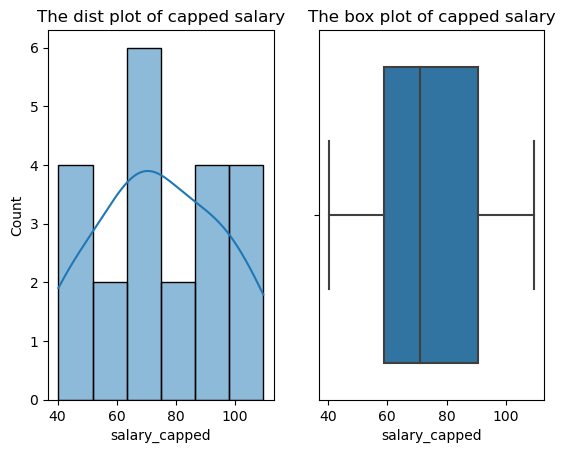

In [48]:
plt.subplot(1, 2, 1)
sns.histplot(df['salary_capped'], kde=True)
plt.title("The dist plot of capped salary")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='salary_capped')
plt.title("The box plot of capped salary")

plt.show()